In [ ]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import pydotplus  


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

In [ ]:
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [ ]:
data['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


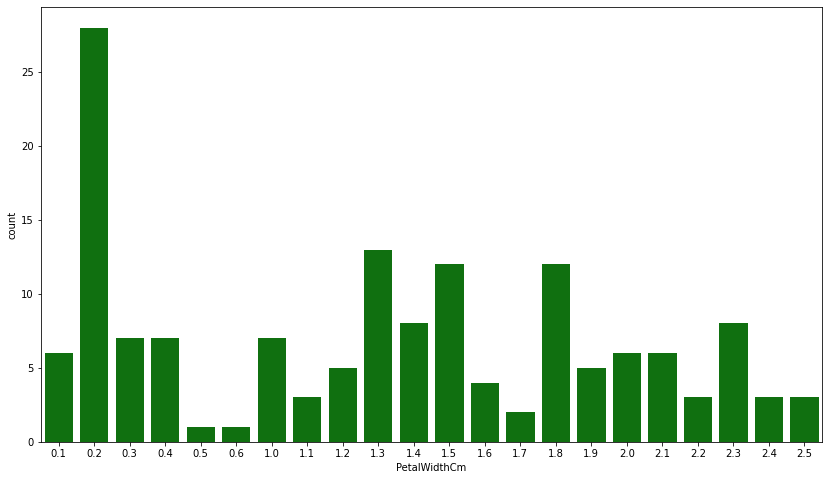

In [ ]:
plt.subplots(figsize=(14,8))
sns.countplot(data['PetalWidthCm'],color = "green")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


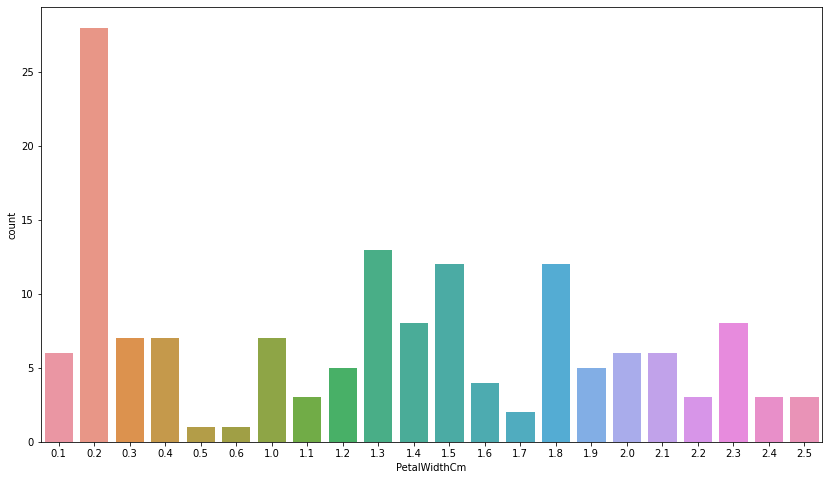

In [ ]:
plt.subplots(figsize=(14,8))
sns.countplot(data['PetalWidthCm'])

In [ ]:
data['Species'].unique() #species is a categorical data

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
len(data[data['Species'] == 'Iris-setosa'])

50

In [ ]:
def converter(s):#to convert catogorical data into numerical data
  s = s.lower()
  if s == 'iris-setosa':
    return 0
  elif s == 'iris-versicolor':  
    return 1  
  elif s == 'iris-verginica':
    return 2
  else:
    return -1    

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Iris.csv",converters={"Species":converter})

In [ ]:
data.shape

(150, 6)

In [ ]:
 data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3       -1
146  147            6.3           2.5            5.0           1.9       -1
147  148            6.5           3.0            5.2           2.0       -1
148  149            6.2           3.4            5.4           2.3       -1
149  150            5.9           3.0            5.1           1.8       -1

[150 rows x 6 columns]>

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
features = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
labels = data["Species"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(features,labels,test_size=0.3)

In [ ]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
model.predict(X_test)


array([ 0,  0, -1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0, -1,
        1, -1,  0,  1,  1, -1, -1,  0,  0,  1, -1, -1,  0,  1,  1,  1,  0,
        1,  1, -1,  1,  1, -1, -1,  1,  0, -1,  1])

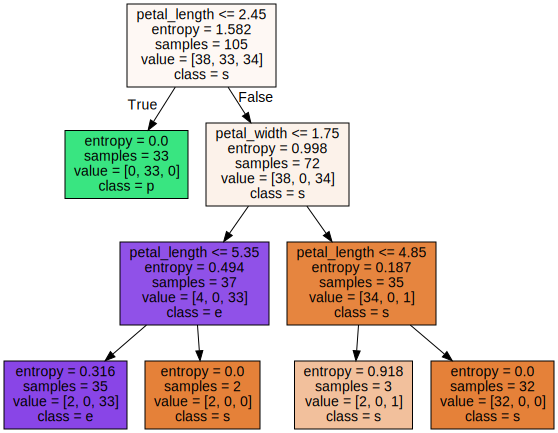

In [ ]:
import graphviz
from sklearn import tree
#Dot data
dot_data = tree.export_graphviz(model,out_file=None,feature_names=['sepal_length','sepal_width','petal_length','petal_width'],class_names="species",filled=True)
#Draw graph
graph = graphviz.Source(dot_data,format="png")
graph
#Here sample = 105 because (training it is taking 105 samples anf for testing it will take 45 sample(since,we have taken test_size =0.3))